Ahmet Alperen Gungor, 28847
Elifnur Ozturk, 28857 
Ayse Sena Acar, 29506
Baris Bakirdoven, 29028

In [ ]:
from google.colab import drive
drive.mount("./drive")

Mounted at ./drive


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from keras.datasets import cifar10
import numpy as np
import pickle
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [ ]:
# Function to load each batch file
def load_cifar_batch(file):
    with open("./drive/My Drive/dataset/" + file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict[b'data'], dict[b'labels']

# Define batch files
batch_files = ['data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5']

In [ ]:
best_params = None
best_accuracy = 0
max_depth_values = [10, 20, 30, None] # the max depth values we will try

In [ ]:
accuracy_scores = []
# Perform 5-fold cross-validation
for max_depth in max_depth_values:
    fold_accuracies = []

    for i in range(len(batch_files)):
        # Create a new list without the i-th batch file
        train_files = batch_files[:i] + batch_files[i+1:]

        # Load, reshape and combine training data batches
        X_train = np.concatenate([load_cifar_batch(batch)[0].reshape(-1, 3 * 32 * 32) / 255.0 for batch in train_files])
        y_train = np.concatenate([load_cifar_batch(batch)[1] for batch in train_files])

        # Load and reshape validation data batch
        X_val = load_cifar_batch(batch_files[i])[0].reshape(-1, 3 * 32 * 32) / 255.0
        y_val = load_cifar_batch(batch_files[i])[1]

        # Train a Decision Tree model
        dt = DecisionTreeClassifier(max_depth=max_depth)
        dt.fit(X_train, y_train)

        # Validate the model
        val_preds = dt.predict(X_val)
        val_accuracy = accuracy_score(y_val, val_preds)

        fold_accuracies.append(val_accuracy)

    # Compute the mean accuracy over the 5 folds
    mean_accuracy = np.mean(fold_accuracies)

    accuracy_scores.append(mean_accuracy)

    # Update the best parameters if this configuration is better
    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_params = max_depth

    print(f"max_depth = {max_depth}, Validation Accuracy = {mean_accuracy}")

print(f"Best hyperparameters: max_depth = {best_params}, Cross-Validation Accuracy = {best_accuracy}")


max_depth = 10, Validation Accuracy = 0.29188000000000003
max_depth = 20, Validation Accuracy = 0.26268
max_depth = 30, Validation Accuracy = 0.2605
max_depth = None, Validation Accuracy = 0.26083999999999996
Best hyperparameters: max_depth = 10, Cross-Validation Accuracy = 0.29188000000000003


In [ ]:
# Now, use the best hyperparameters to train a model on all the training data
X_train_combined = np.concatenate([load_cifar_batch(batch)[0].reshape(-1, 3 * 32 * 32) / 255.0 for batch in batch_files])
y_train_combined = np.concatenate([load_cifar_batch(batch)[1] for batch in batch_files])

dt_final = DecisionTreeClassifier(max_depth=best_params)
dt_final.fit(X_train_combined, y_train_combined)

# Load the test batch
test_batch = load_cifar_batch('test_batch')

# reshape test data and labels
X_test = test_batch[0].reshape(-1, 3 * 32 * 32) / 255.0
y_test = test_batch[1]

# Test the final model
test_preds = dt_final.predict(X_test)
test_accuracy = accuracy_score(y_test, test_preds)

print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.3061


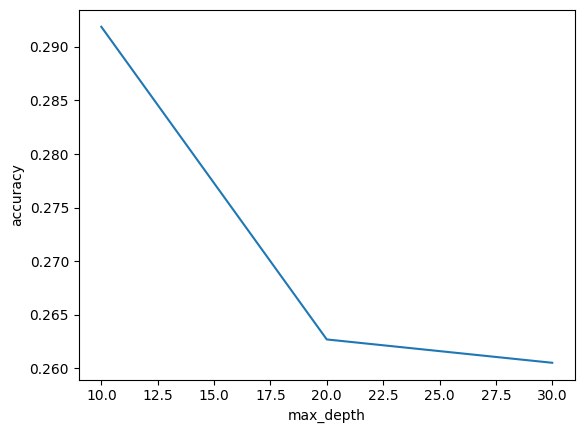

In [ ]:
# Plot the accuracy scores vs max_depth values
plt.plot(max_depth_values, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show()